In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
##now we will define list of all companies whose data we want to analyse in a list
company_list=['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
path=r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr'
all_data=pd.DataFrame()  ##this dataframe to store all csv files in a single one
for file in company_list:
    current_df=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data,current_df])


In [4]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

### Analyse closing price of all stocks

In [8]:
all_data['date']=pd.to_datetime(all_data['date'])

In [9]:
tech_list=all_data['Name'].unique() #unique company list for iteration

C:\Users\brajk\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


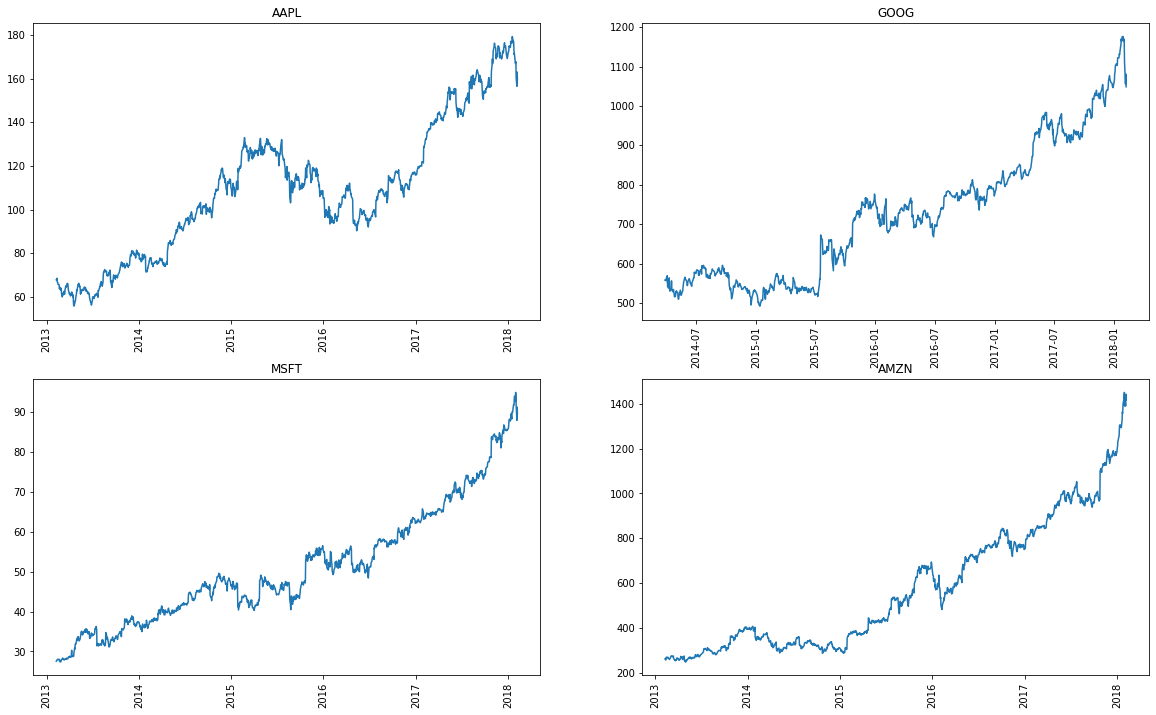

In [10]:
##now we will plot for all companies individually
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)

### Analyze the total volume of stock being traded each day

In [12]:
import plotly.express as px

In [13]:
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()

### Analyze daily price change in stock

In [17]:
## add a column of % return to the dataframe
all_data['1day % return']=((all_data['close']-all_data['open'])/all_data['close'])*100

In [18]:
all_data.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   1day % return  
0       0.206325  
1       0.714688  
2      -2.481344  
3      -0.042869  
4       0.443624

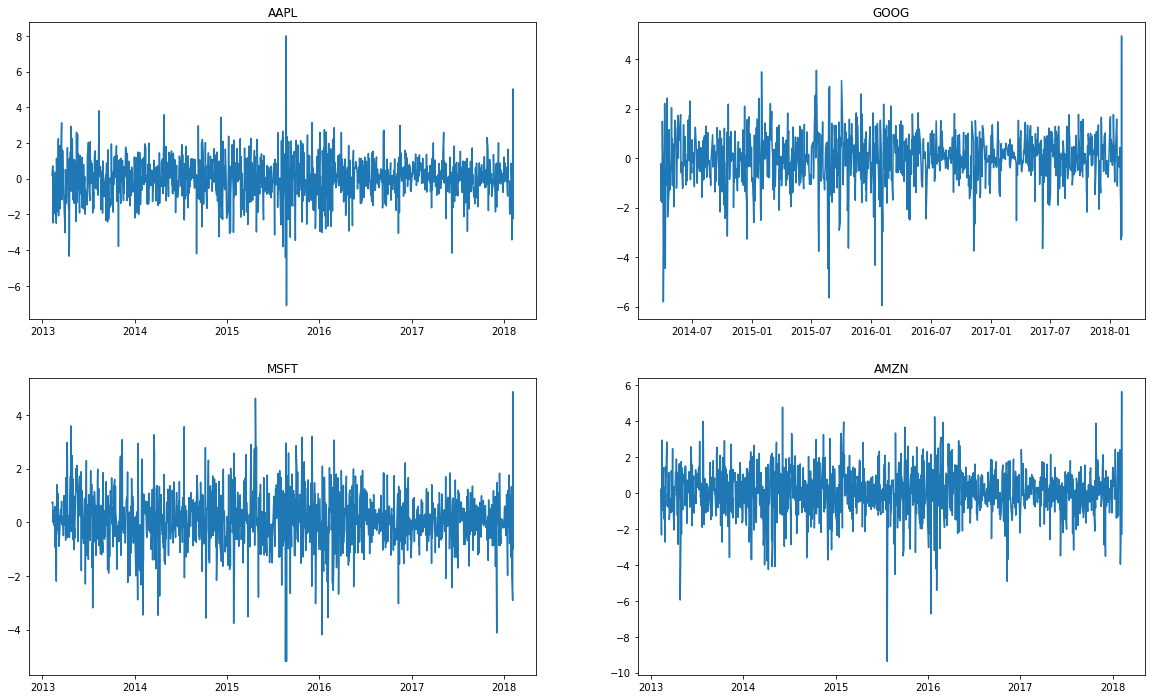

In [19]:
##plot it using plotly
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['1day % return'])
    plt.title(company)

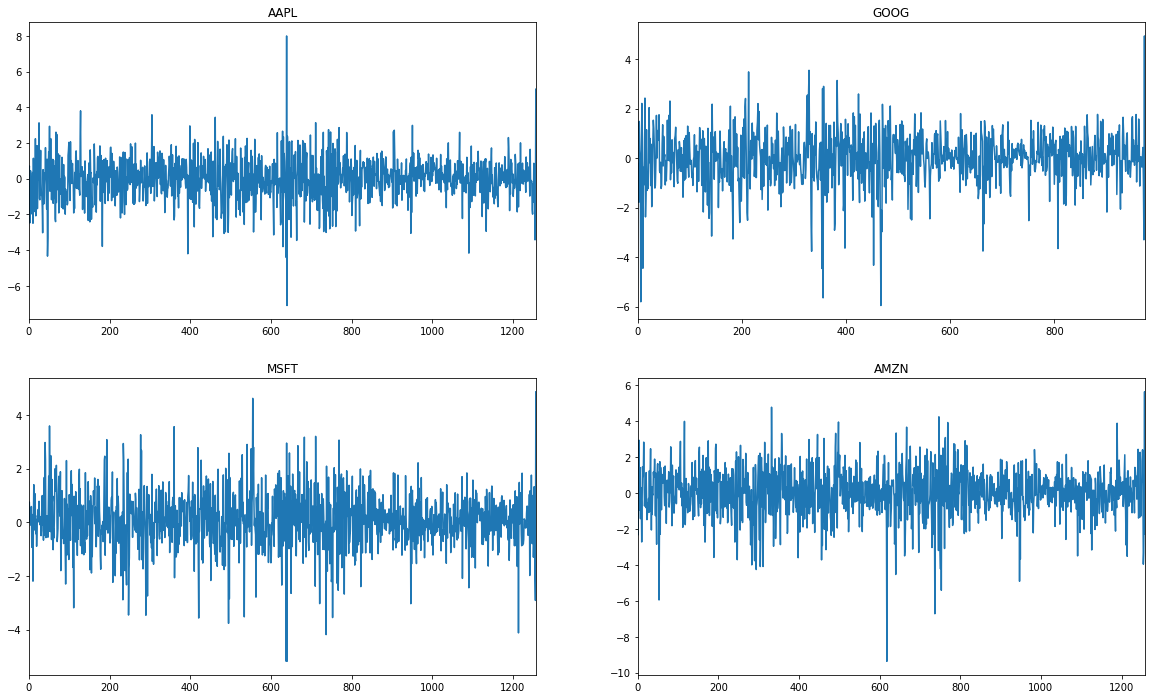

In [20]:
##plot using matplotlib
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    df['1day % return'].plot()
    plt.title(company)

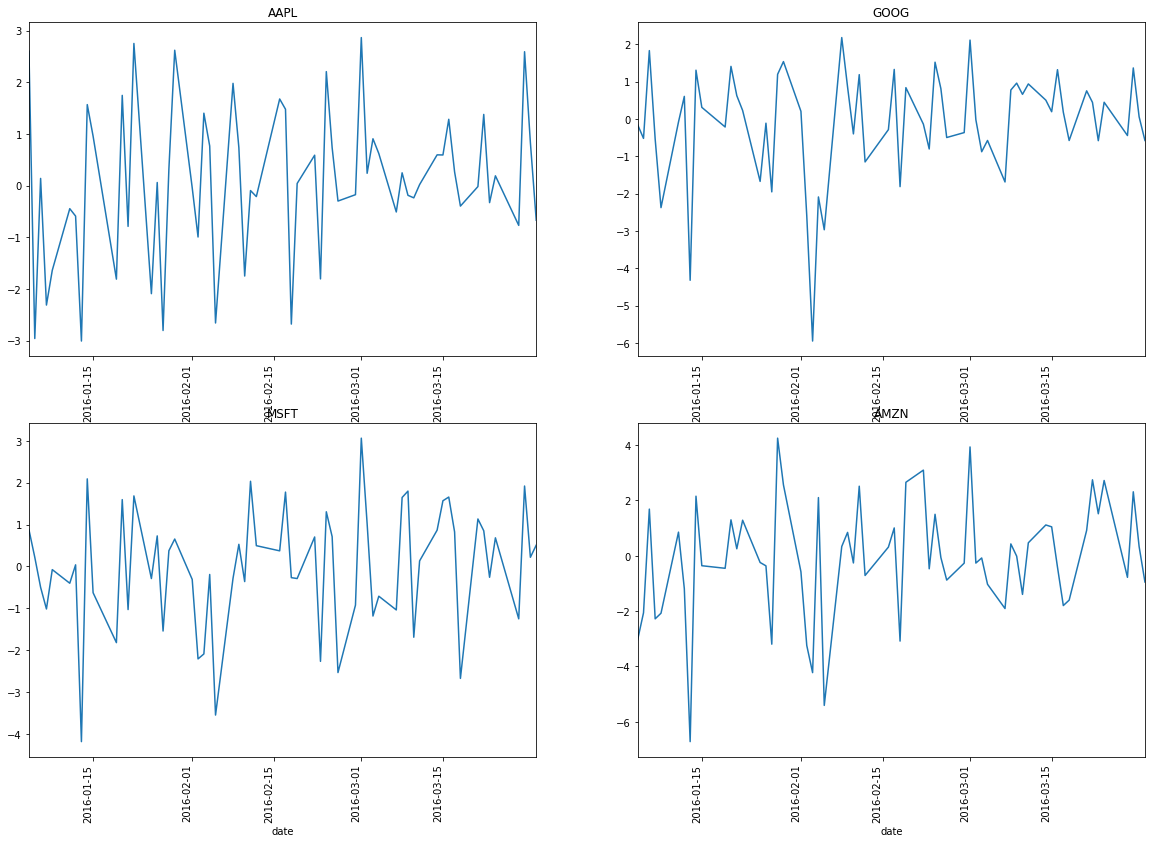

In [23]:
# plot for particular date duration only
plt.figure(figsize=(20,15))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
    plt.xticks(rotation='vertical')
    plt.title(company)

### Analyse monthly mean of close feature

In [4]:
df=pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr/AAPL_data.csv')

In [5]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
##we will change data type of date column
df['date']=pd.to_datetime(df['date'])

In [7]:
df.set_index('date',inplace=True)

In [8]:
df.head()

open     high      low    close     volume  Name
date                                                           
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

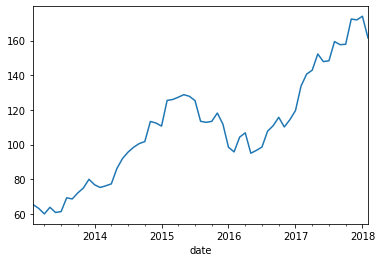

In [11]:
## now we will resample the close column on monthly basis and calculate its mean and plot it
df['close'].resample('M').mean().plot()

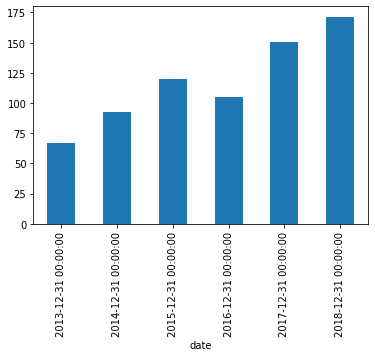

In [12]:
df['close'].resample('Y').mean().plot(kind='bar')

### Analyse whether the stock prices of these companies(apple,amazon,google,microsoft) are correlated or not

In [16]:
#we will read data of these 4 companies in separate data frames
aapl=pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr/AAPL_data.csv')
aapl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [17]:
amzn=pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr/AMZN_data.csv')
amzn.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [18]:
msft=pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr/MSFT_data.csv')
msft.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [19]:
goog=pd.read_csv(r'C:\Users\brajk\Desktop\Data Analytics Projects\Project 2- Stock Price analysis\individual_stocks_5yr/GOOG_data.csv')
goog.head()

date     open    high     low   close  volume  Name
0  2014-03-27  568.000  568.00  552.92  558.46   13052  GOOG
1  2014-03-28  561.200  566.43  558.67  559.99   41003  GOOG
2  2014-03-31  566.890  567.00  556.93  556.97   10772  GOOG
3  2014-04-01  558.710  568.45  558.71  567.16    7932  GOOG
4  2014-04-02  565.106  604.83  562.19  567.00  146697  GOOG

In [20]:
## we will make a new dataframe having just CLOSE data of 4 companies
close=pd.DataFrame()
close['aapl']=aapl['close']
close['amzn']=amzn['close']
close['msft']=msft['close']
close['goog']=goog['close']
close.head()

aapl    amzn   msft    goog
0  67.8542  261.95  27.55  558.46
1  68.5614  257.21  27.86  559.99
2  66.8428  258.70  27.88  556.97
3  66.7156  269.47  28.03  567.16
4  66.6556  269.24  28.04  567.00

In [21]:
import seaborn as sns

C:\Users\brajk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brajk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


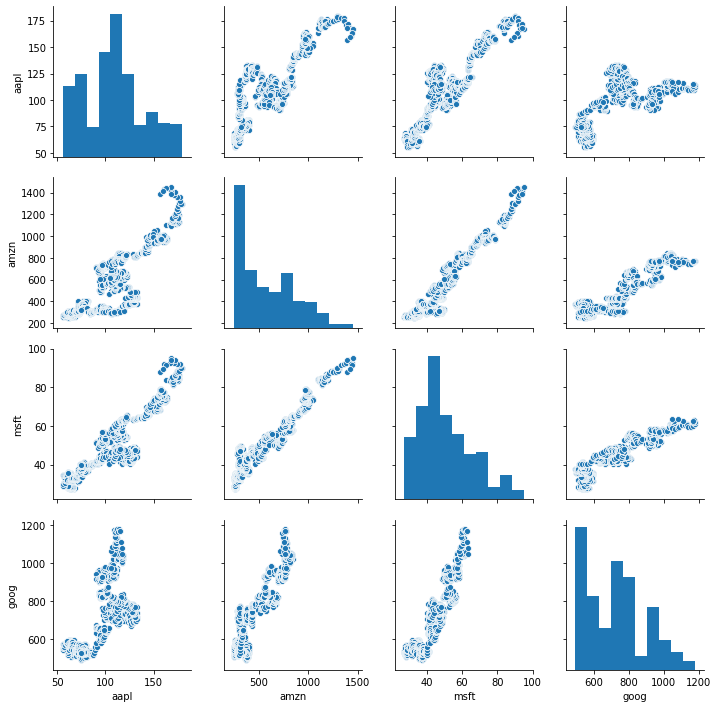

In [22]:
## we will plot correlation data
sns.pairplot(data=close)

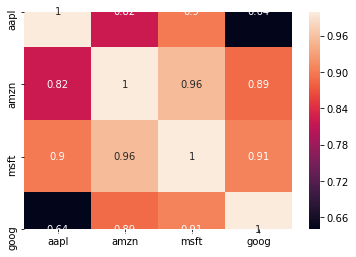

In [23]:
sns.heatmap(close.corr(),annot=True)

### Analyse daily return of each stock & how they are co-related

In [24]:
## first we will create a new dataframe for the needed data and then add columns to it
data=pd.DataFrame()
data['aapl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100
data.head()

aapl_change  amzn_change  goog_change  msft_change
0     0.206325     0.209964    -1.708269     0.725953
1     0.714688    -2.328836    -0.216075     0.753769
2    -2.481344    -0.189409    -1.781065     0.000000
3    -0.042869     2.946525     1.489879     0.356761
4     0.443624     0.694548     0.334039     0.427960

C:\Users\brajk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\brajk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


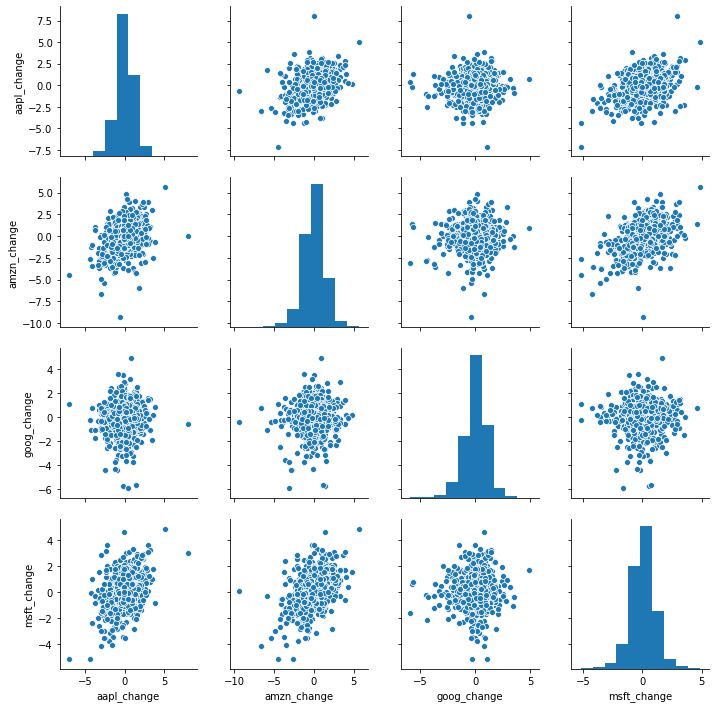

In [25]:
## now again we will plot correlated data like earlier
sns.pairplot(data=data)

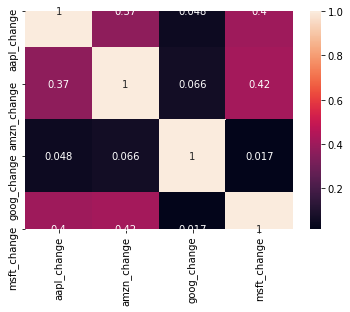

In [26]:
sns.heatmap(data.corr(),annot=True)

### Value at Risk Analysis for Tech Companies

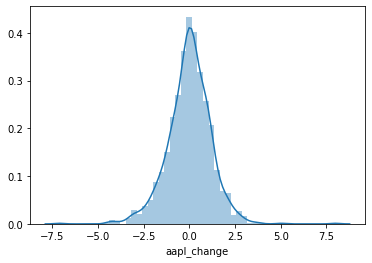

In [32]:
## distribution plot of change data 
sns.distplot(data['aapl_change'])

In [33]:
data['aapl_change'].std()
#68% of entire data

1.1871377131421237

In [34]:
data['aapl_change'].std()*2
#95% of entire data

2.3742754262842474

In [35]:
data['aapl_change'].std()*3
#99.7% of entire data

3.561413139426371

In [36]:
data.describe().T

count      mean       std       min       25%       50%  \
aapl_change  1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
amzn_change  1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   
goog_change   975.0 -0.012495  1.092560 -5.952266 -0.551963  0.024951   
msft_change  1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   

                  75%       max  
aapl_change  0.715427  8.000388  
amzn_change  0.852568  5.640265  
goog_change  0.672649  4.943550  
msft_change  0.703264  4.861491